In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
# Specify the path to the ZIP file
zip_file_path = '/content/drive/MyDrive/Wildfirev2.zip'

# Specify the directory where you want to extract the contents
extract_to_dir = '/content/'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(extract_to_dir)

print(f"Files extracted to: {extract_to_dir}")

Files extracted to: /content/


### creating dataframe

In [6]:
image_dir_test=Path('/content/Wildfirev2/test')
image_dir_train=Path('/content/Wildfirev2/train')
image_dir_val=Path('/content/Wildfirev2/valid')

filepaths_test= list(image_dir_test.glob(r'**/*.jpg'))
filepaths_train= list(image_dir_train.glob(r'**/*.jpg'))
filepaths_val= list(image_dir_val.glob(r'**/*.jpg'))

labels_test=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths_test))
labels_train=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths_train))
labels_val=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths_val))

In [7]:
filepaths_test=pd.Series(filepaths_test,name='Filepath').astype(str)
labels_test=pd.Series(labels_test,name='Label')
image_df_test=pd.concat([filepaths_test,labels_test],axis=1)
image_df_test

,Filepath,Label
0,"/content/Wildfirev2/test/wildfire/-68.944,48.8...",wildfire
1,"/content/Wildfirev2/test/wildfire/-66.3263,50....",wildfire
2,"/content/Wildfirev2/test/wildfire/-71.75566,45...",wildfire
3,"/content/Wildfirev2/test/wildfire/-73.4715,46....",wildfire
4,"/content/Wildfirev2/test/wildfire/-76.18942,45...",wildfire
...,...,...
5635,/content/Wildfirev2/test/nowildfire/-79.301886...,nowildfire
5636,/content/Wildfirev2/test/nowildfire/-73.547417...,nowildfire
5637,/content/Wildfirev2/test/nowildfire/-79.554177...,nowildfire
5638,/content/Wildfirev2/test/nowildfire/-73.534282...,nowildfire


In [8]:
filepaths_train=pd.Series(filepaths_train,name='Filepath').astype(str)
labels_train=pd.Series(labels_train,name='Label')
image_df_train=pd.concat([filepaths_train,labels_train],axis=1)
image_df_train

,Filepath,Label
0,"/content/Wildfirev2/train/wildfire/-72.62495,4...",wildfire
1,"/content/Wildfirev2/train/wildfire/-72.67409,4...",wildfire
2,"/content/Wildfirev2/train/wildfire/-68.6974,49...",wildfire
3,"/content/Wildfirev2/train/wildfire/-68.15267,5...",wildfire
4,"/content/Wildfirev2/train/wildfire/-78.36513,4...",wildfire
...,...,...
19995,/content/Wildfirev2/train/nowildfire/-75.77043...,nowildfire
19996,/content/Wildfirev2/train/nowildfire/-79.27686...,nowildfire
19997,/content/Wildfirev2/train/nowildfire/-113.9858...,nowildfire
19998,/content/Wildfirev2/train/nowildfire/-113.9793...,nowildfire


In [9]:
filepaths_val=pd.Series(filepaths_val,name='Filepath').astype(str)
labels_val=pd.Series(labels_val,name='Label')
image_df_val=pd.concat([filepaths_val,labels_val],axis=1)
image_df_val

,Filepath,Label
0,"/content/Wildfirev2/valid/wildfire/-69.46921,4...",wildfire
1,"/content/Wildfirev2/valid/wildfire/-72.26571,4...",wildfire
2,"/content/Wildfirev2/valid/wildfire/-77.46733,4...",wildfire
3,"/content/Wildfirev2/valid/wildfire/-73.2475,47...",wildfire
4,"/content/Wildfirev2/valid/wildfire/-79.2937,48...",wildfire
...,...,...
5635,/content/Wildfirev2/valid/nowildfire/-122.8786...,nowildfire
5636,/content/Wildfirev2/valid/nowildfire/-73.48774...,nowildfire
5637,/content/Wildfirev2/valid/nowildfire/-114.0169...,nowildfire
5638,/content/Wildfirev2/valid/nowildfire/-114.0344...,nowildfire


In [10]:
print(image_df_train.shape)
print(image_df_test.shape)
print(image_df_val.shape)

(20000, 2)
(5640, 2)
(5640, 2)


In [11]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMAGE_SIZE = [IMG_HEIGHT,IMG_WIDTH]
BATCH_SIZE = 64
NUM_OF_CLASSES = 1
EPOCHS = 30

train_generator= keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_generator= keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator= keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_images=train_generator.flow_from_dataframe(
    dataframe=image_df_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode='rgb',
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_images=val_generator.flow_from_dataframe(
    dataframe=image_df_val,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode='rgb',
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_images=test_generator.flow_from_dataframe(
    dataframe=image_df_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode='rgb',
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5640 validated image filenames belonging to 2 classes.
Found 5640 validated image filenames belonging to 2 classes.


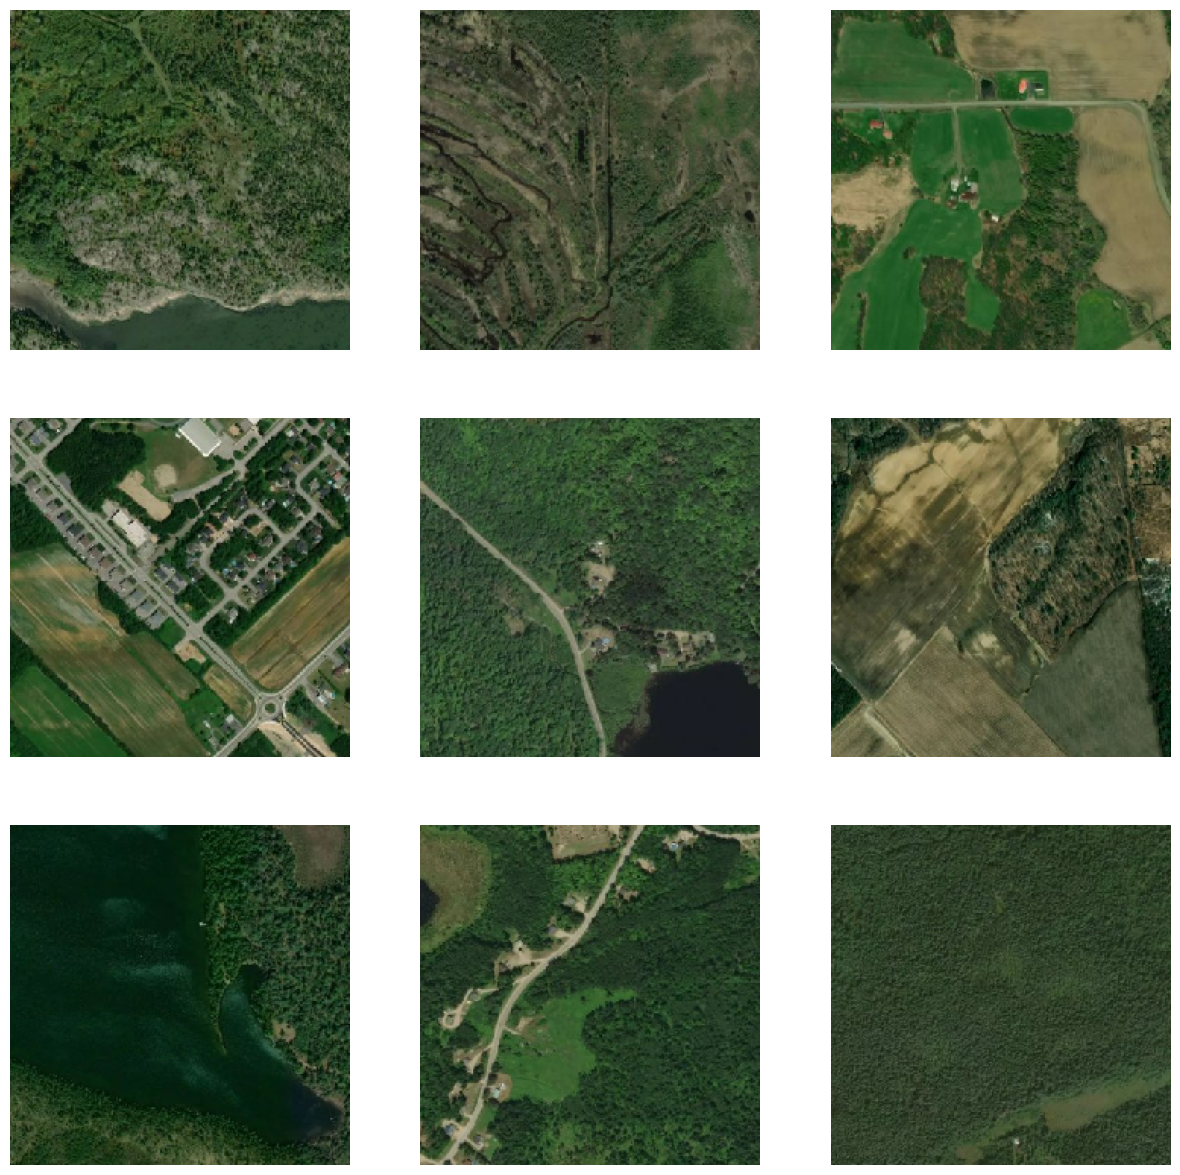

In [12]:
plt.figure(figsize=(15,15))
for images, labels in test_images:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        #plt.title(int(labels[i]))
        plt.axis("off")
    break

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in train_images:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        #plt.title(int(labels[i]))
        plt.axis("off")
    break

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in val_images:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        #plt.title(int(labels[i]))
        plt.axis("off")
    break

### Model

In [13]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.regularizers import l2
from keras.applications import VGG16

input_shape = (224,224,3)
ACTIVATION = 'relu'
PADDING = 'same'
DROPOUT_RATE = 0.1
EPSILON = 0.001

vgg16 = VGG16(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3), weights='imagenet', include_top=False)

# Freeze layers
for layer in vgg16.layers:
    layer.trainable = False

# Create a Sequential model
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, kernel_regularizer=l2(0.01)))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
__________

In [14]:
history=model.fit(
    train_images,
    validation_data=val_images,
    epochs=EPOCHS,

    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=4,
            restore_best_weights=True
        ),
         tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/30
313/313 [==============================] - 130s 367ms/step - loss: 1.3240 - accuracy: 0.9032 - precision: 0.8984 - recall: 0.9091 - val_loss: 0.3793 - val_accuracy: 0.9186 - val_precision: 0.9664 - val_recall: 0.8674 - lr: 0.0010
Epoch 2/30
313/313 [==============================] - 104s 331ms/step - loss: 0.3095 - accuracy: 0.9229 - precision: 0.9134 - recall: 0.9343 - val_loss: 0.2372 - val_accuracy: 0.9399 - val_precision: 0.9131 - val_recall: 0.9723 - lr: 0.0010
Epoch 3/30
313/313 [==============================] - 103s 327ms/step - loss: 0.2739 - accuracy: 0.9222 - precision: 0.9119 - recall: 0.9346 - val_loss: 0.2579 - val_accuracy: 0.9223 - val_precision: 0.8776 - val_recall: 0.9816 - lr: 0.0010
Epoch 4/30
313/313 [==============================] - 103s 328ms/step - loss: 0.2616 - accuracy: 0.9234 - precision: 0.9118 - recall: 0.9375 - val_loss: 0.2561 - val_accuracy: 0.9202 - val_precision: 0.8801 - val_recall: 0.9730 - lr: 0.0010
Epoch 5/30
313/313 [================

In [15]:
model.save('Wildfire_vgg16_L2_DO.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


89/89 [==============================] - 27s 307ms/step - loss: 0.1393 - accuracy: 0.9608 - precision: 0.9552 - recall: 0.9670
test loss: 0.13930
test acc: 96.08
89/89 [==============================] - 24s 264ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

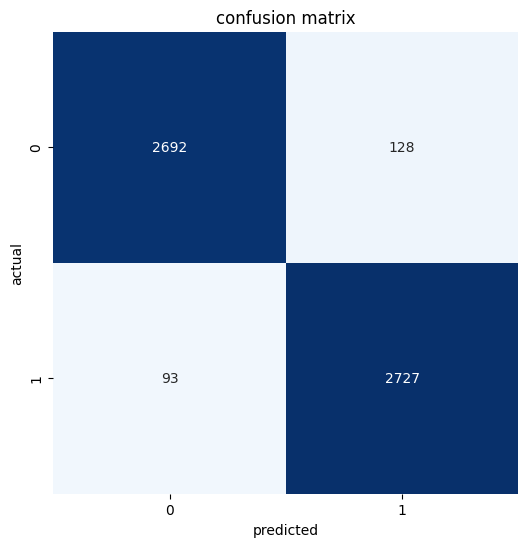

In [16]:
results=model.evaluate(test_images)
print("test loss: {:.5f}".format(results[0]))
print("test acc: {:.2f}".format(results[1]*100))
predictions=(model.predict(test_images)>=0.5).astype(int)
cm=confusion_matrix(test_images.labels,predictions,labels=[0,1])
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cmap='Blues',cbar=False)
plt.xticks(ticks=[0.5,1.5],label=["nowildfire","wildfire"])
plt.yticks(ticks=[0.5,1.5],label=["nowildfire","wildfire"])
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show

In [17]:
results = model.evaluate(val_images,batch_size=16)
print("Loss:", results[0])
print("Accuracy:", results[1])
print("Precision:", results[2])
print("Recall:", results[3])

89/89 [==============================] - 23s 255ms/step - loss: 0.1587 - accuracy: 0.9532 - precision: 0.9462 - recall: 0.9610
Loss: 0.15867926180362701
Accuracy: 0.9531915187835693
Precision: 0.9462290406227112
Recall: 0.9609929323196411


In [18]:
results = model.evaluate(test_images,batch_size=16)
print("Loss:", results[0])
print("Accuracy:", results[1])
print("Precision:", results[2])
print("Recall:", results[3])

89/89 [==============================] - 23s 261ms/step - loss: 0.1393 - accuracy: 0.9608 - precision: 0.9552 - recall: 0.9670
Loss: 0.13929755985736847
Accuracy: 0.9608156085014343
Precision: 0.9551663994789124
Recall: 0.9670212864875793


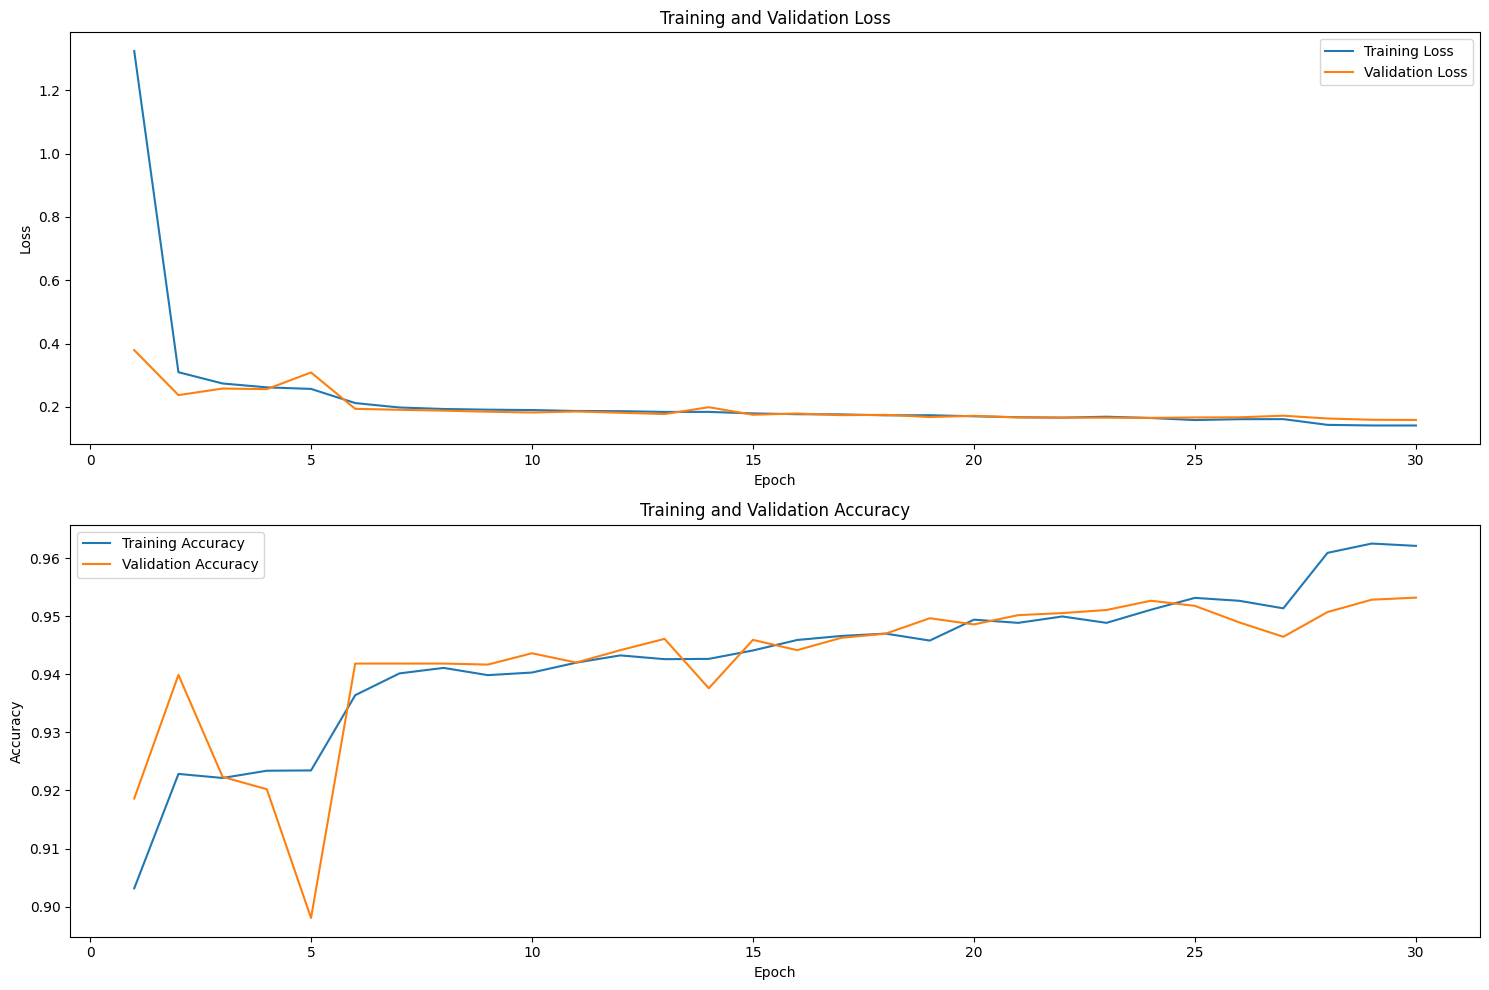

In [19]:
import matplotlib.pyplot as plt

# Assuming `history` contains the training history

# Extracting metrics
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(loss) + 1)

# Plotting subplots
plt.figure(figsize=(15, 10))

# Loss subplot
plt.subplot(2, 1, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(2, 1, 2)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

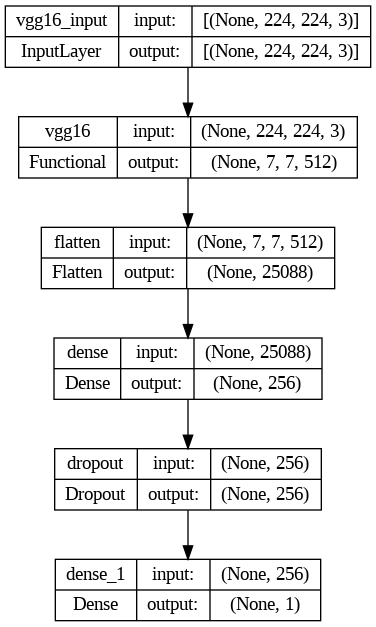

In [20]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [21]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 9.6 MB/s eta 0:00:00


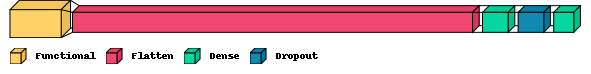

In [22]:
import visualkeras
visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
#font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True) # selected font